# Quartiles, Quantiles, and IQR

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import iqr

If you have n quantiles, the dataset will be split into n+1 groups of equal size

### Deciles
Deciles are a special form of quantiles with 10 groups.

### Percentiles
Percentiles are a special form of quantiles with 100 groups.

### Quartiles
Quartiles are a special form of quantiles with 4 groups.

Quartile 2 is the same as the median

Quartile 1 is the median of everything to the left of Q2

Quartile 3 is the median of everything to the right of Q2

In [6]:
dataset_one = [-20, -3, 2, 4, 4, 10, 50]
dataset_one_q1 = -3
dataset_one_q2 = 4
dataset_one_q3 = 10

Numpy includes the median when calculating Q1 and Q3,
and that's why it differs from the numbers above

In [7]:
print('Q1', np.quantile(dataset_one, 0.25))
print('Q2', np.quantile(dataset_one, 0.5))
print('Q3', np.quantile(dataset_one, 0.75))

Q1 -0.5
Q2 4.0
Q3 7.0


Even easier way to calculate quartiles:

In [8]:
print('quartiles', np.quantile(dataset_one, [0.25, 0.5, 0.75]))

quartiles [-0.5  4.   7. ]


## Range

In [9]:
print('range', range(1, 10)) # This works for integers only
print(np.arange(0.1, 1.0, 0.1)) # Use this for floats
print(np.arange(0.1, 1.0, 0.1)) # useful for calculating deciles
print(np.arange(0.1, 1.0, 0.01)) # useful for calculating percentiles (you can also use np.percentile, see 04_categorical_data.ipynb)

range range(1, 10)
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23
 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37
 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51
 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65
 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79
 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93
 0.94 0.95 0.96 0.97 0.98 0.99]


In [12]:
# See 03b_describe_a_histogram.py on how this data was retrieved
cp_data = pd.read_csv('chest_pain_treatment_costs.csv')
ave_covered_charges = cp_data[' Average Covered Charges ']

## Interquartile Range (IQR)

In [13]:
q1 = np.quantile(ave_covered_charges, 0.25)
q3 = np.quantile(ave_covered_charges, 0.75)
interquartile_range = q3 - q1
print('Total range', ave_covered_charges.max() - ave_covered_charges.min())
print('IQR is the range between Q1 and Q3 and gets rid of the outliers',
      interquartile_range)

Total range 78623.6
IQR is the range between Q1 and Q3 and gets rid of the outliers 9619.985


Can also use scipy to calculate IQR

In [14]:
print('IQR with scipy', iqr(ave_covered_charges))

IQR with scipy 9619.985


## Quantiles

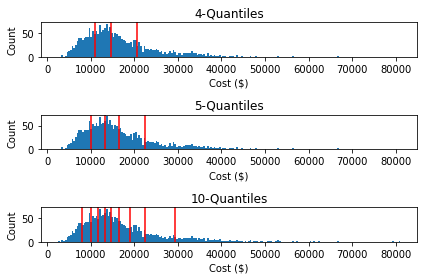

In [17]:
q1 = np.quantile(ave_covered_charges, 0.25)
q2 = np.quantile(ave_covered_charges, 0.5)
q3 = np.quantile(ave_covered_charges, 0.75)

plt.subplot(3, 1, 1)
plt.hist(ave_covered_charges, bins=200)
plt.axvline(x=q1, c='r')
plt.axvline(x=q2, c='r')
plt.axvline(x=q3, c='r')
plt.xlabel("Cost ($)")
plt.ylabel("Count")
plt.title("4-Quantiles")

plt.subplot(3, 1, 2)
plt.hist(ave_covered_charges, bins=200)
plt.axvline(x=np.quantile(ave_covered_charges, 0.2), c='r')
plt.axvline(x=np.quantile(ave_covered_charges, 0.4), c='r')
plt.axvline(x=np.quantile(ave_covered_charges, 0.6), c='r')
plt.axvline(x=np.quantile(ave_covered_charges, 0.8), c='r')
plt.xlabel("Cost ($)")
plt.ylabel("Count")
plt.title("5-Quantiles")

plt.subplot(3, 1, 3)
plt.hist(ave_covered_charges, bins=200)
for i in range(1, 10):
    plt.axvline(x=np.quantile(ave_covered_charges, i/10), c='r')
plt.xlabel("Cost ($)")
plt.ylabel("Count")
plt.title("10-Quantiles")

plt.tight_layout()
plt.show()